<a href="https://colab.research.google.com/github/eetoorivarshika06/Aushad/blob/main/Natural_Gas_Price_Estimation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [10]:
from google.colab import files
uploaded = files.upload()  # This will open a prompt to upload the CSV
import io
gas_df = pd.read_csv(io.BytesIO(uploaded['Nat_Gas.csv']))
gas_df.head()


Saving Nat_Gas.csv to Nat_Gas.csv


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [11]:
gas_df["Dates"] = pd.to_datetime(gas_df["Dates"])


/tmp/ipython-input-190116879.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gas_df["Dates"] = pd.to_datetime(gas_df["Dates"])


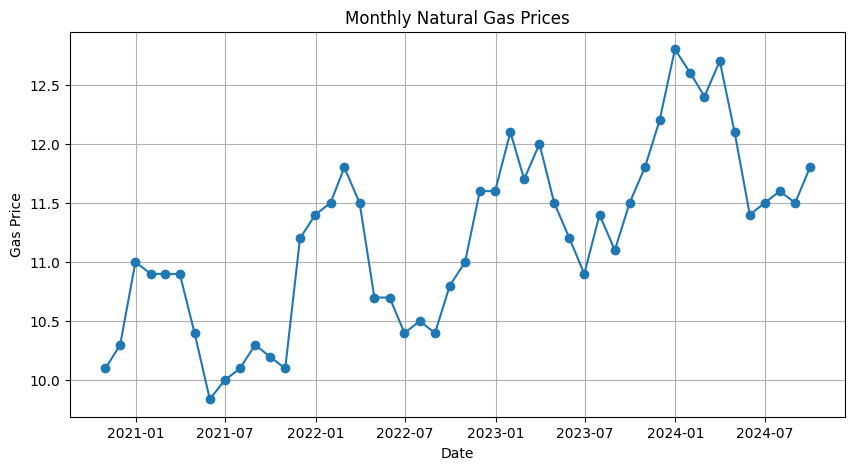

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(gas_df["Dates"], gas_df["Prices"], marker="o")
plt.xlabel("Date")
plt.ylabel("Gas Price")
plt.title("Monthly Natural Gas Prices")
plt.grid(True)
plt.show()


In [14]:
gas_df["date_ordinal"] = gas_df["Dates"].map(pd.Timestamp.toordinal)


In [16]:
from scipy.interpolate import interp1d
price_interpolator = interp1d(
    gas_df["date_ordinal"],
    gas_df["Prices"],
    kind="linear",
    fill_value="extrapolate"
)

In [17]:
def estimate_gas_price(input_date):
    input_date = pd.to_datetime(input_date)
    ordinal_date = input_date.toordinal()
    return float(price_interpolator(ordinal_date))


In [18]:
print("Price on 2021-06-15:", estimate_gas_price("2021-06-15"))
print("Price on 2022-12-01:", estimate_gas_price("2022-12-01"))


Price on 2021-06-15: 9.92
Price on 2022-12-01: 11.6


In [19]:
future_dates = pd.date_range(
    start=gas_df["Dates"].max(),
    periods=13,
    freq="M"
)

future_prices = [estimate_gas_price(d) for d in future_dates]


/tmp/ipython-input-3641180251.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


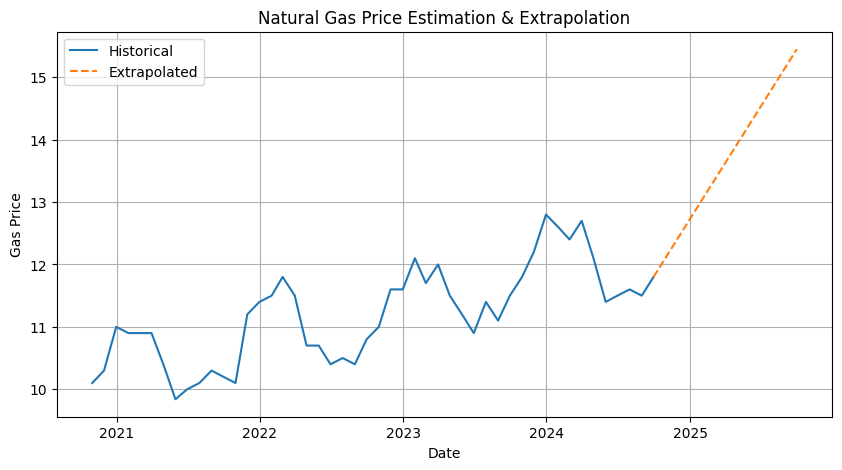

In [20]:
plt.figure(figsize=(10,5))
plt.plot(gas_df["Dates"], gas_df["Prices"], label="Historical")
plt.plot(future_dates, future_prices, linestyle="--", label="Extrapolated")
plt.xlabel("Date")
plt.ylabel("Gas Price")
plt.title("Natural Gas Price Estimation & Extrapolation")
plt.legend()
plt.grid(True)
plt.show()


Monthly natural gas prices were analyzed using historical market snapshots. A linear interpolation model was built to estimate gas prices for any date in the past and extrapolate prices one year into the future. Seasonal price patterns were observed, with higher prices typically occurring in winter months due to increased heating demand. The model provides indicative prices suitable for exploratory storage contract valuation under manual oversight.